# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives


#### Description
**Business Context**<br>
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.<br><br>
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.<br><br>
Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as **A/B testing**, is used to determine whether a new feature attracts users based on a chosen metric.<br><br>
**Objective**<br>
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to **determine the effectiveness of the new landing page in gathering new subscribers for the news portal** by answering the following questions:<br>
&emsp; 1) Do the users spend more time on the new landing page than on the existing landing page?<br>
&emsp; 2) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?<br>
&emsp; 3) Does the converted status depend on the preferred language?<br>
&emsp; 4) Is the time spent on the new page the same for the different language users?<br>

**Data Dictionary**<br>
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.<br>
* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view tng new subscribers.<br>


### PROBLEM STATEMENT AND OBJECTIVES:
E-news Express need to **test their new landing page effectiveness in terms of conversion rate**. For this it will be conducted an **A/B testing** to compare results on the control and treatement groups.<br>
The Null Hypotesis (Ho) will be the new landing portal doesn't generates an improvement in gatering new subscribers, while the Alternative Hypotesis (Ha) is that the new landing portal in fact generates an improvement in gatering new subscribers.<br>

## Import all the necessary libraries

In [53]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Common Libraries
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import scipy.stats as stats # mathematical algorithms and convenience functions
import statsmodels.stats.multicomp as stats_sm # statistical models, statistical tests, and statistical data exploration
import statsmodels.stats.proportion as stats_sp # statistical models, statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

# Command to tell Python to actually display the graphs
%matplotlib inline 
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

#create html version
#!jupyter nbconvert --to html ENews_Express_Learner_Notebook_Full_Code.ipynb

## Reading the Data into a DataFrame

In [2]:
# dataset read
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 100 rows and 6 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [9]:
df.nunique()

user_id                   100
group                       2
landing_page                2
time_spent_on_the_page     94
converted                   2
language_preferred          3
dtype: int64

In [10]:
#data with categorical variables only
df_cat=df.drop(['user_id','time_spent_on_the_page'],axis='columns')
df_cat.head()

,group,landing_page,converted,language_preferred
0,control,old,no,Spanish
1,treatment,new,yes,English
2,treatment,new,no,Spanish
3,control,old,no,French
4,treatment,new,yes,Spanish


In [11]:
# Checking if all levels of the categories are appropriately defined
for i in df_cat.columns:
    print (i,": ",df_cat[i].unique())

group :  ['control' 'treatment']
landing_page :  ['old' 'new']
converted :  ['no' 'yes']
language_preferred :  ['Spanish' 'English' 'French']


In [12]:
# Checking problem statement "selecting 100 users and dividing them equally into two groups"
df_cat['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

#### EXPLORATORY DATA ANALYSIS RESULTS:
From the data overview is concluded:
* The data file was properly loaded and contains data expected (random selection of 100 users, divided equally into two groups)
* There are 100 rows and 6 columns.
* Rows corresponds to users, having 100 users and a unique id per user, so each row represents a single and unique user.
* Columns correspond to dictionary, having in total 6 coumns, 4 of those categorical ('group', 'landing_page', 'converted', 'language_preferred'), and 2 of those numerical ('user_id', 'time_spent_on_the_page').
* There are no null values in the data.
* The categorical variables has no errors like repetition or case missmatch:
  * group :  ['control' 'treatment']
  * landing_page :  ['old' 'new']
  * converted :  ['no' 'yes']
  * language_preferred :  ['Spanish' 'English' 'French']
* The 100 users are effectively divided into two equal groups:
  * old    50
  * new    50


### Univariate Analysis

In [15]:
#f, axs = plt.subplots(2, 2, figsize=(8, 5))

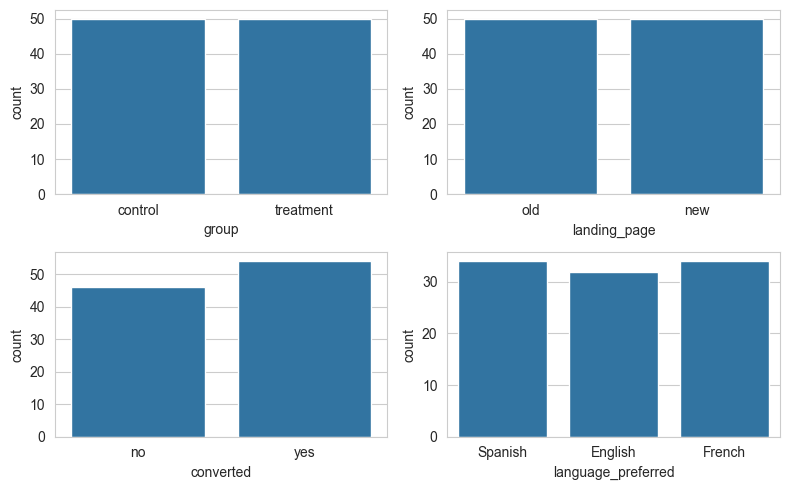

In [14]:
f, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.countplot(data=df_cat, x=df_cat.columns[0], ax=axs[0,0])
sns.countplot(data=df_cat, x=df_cat.columns[1], ax=axs[0,1])
sns.countplot(data=df_cat, x=df_cat.columns[2], ax=axs[1,0])
sns.countplot(data=df_cat, x=df_cat.columns[3], ax=axs[1,1])
f.tight_layout()

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(15, 5),gridspec_kw=dict(width_ratios=[1,1.5]))
sns.histplot(data=df, x="time_spent_on_the_page",ax=axs[0],kde=True)
sns.boxplot(data=df, x="time_spent_on_the_page", ax=axs[1])
f.tight_layout()

### UNIVARIATE ANALYSIS RESULTS:

From the univariate analysis is concluded:
* As the number of rows is 100 the "count" plots also could be read as "percentage"
* Very even distribution of the sample on the four categorical variables
* The variable time_spend_on_the_page has a normal distribution with no outliers and a mean of 5.38hrs aligned with media of 5.42hrs


### Bivariate Analysis

Bivariate analysis performed initially considering the variable of interest 'converted' to check how the conversion rate might be related with other variables

In [16]:
# Check relation of convertion rate with group type
conv_group=pd.crosstab(df['group'],df['converted'],normalize='index')
#conv_group.plot.bar(stacked=True);
conv_group

converted,no,yes
group,,
control,0.58,0.42
treatment,0.34,0.66


In [17]:
# Check relation of convertion rate with landing_page type
conv_page=pd.crosstab(df['landing_page'],df['converted'],normalize='index')
#conv_page.plot.bar(stacked=True);
conv_page

converted,no,yes
landing_page,,
new,0.34,0.66
old,0.58,0.42


In [18]:
# Check relation of convertion rate with language_preferred type
conv_lang=pd.crosstab(df['language_preferred'],df['converted'],normalize='index')
#conv_lang.plot.bar(stacked=True);
conv_lang.sort_values(by='yes', ascending=False)

converted,no,yes
language_preferred,,
English,0.34,0.66
Spanish,0.47,0.53
French,0.56,0.44


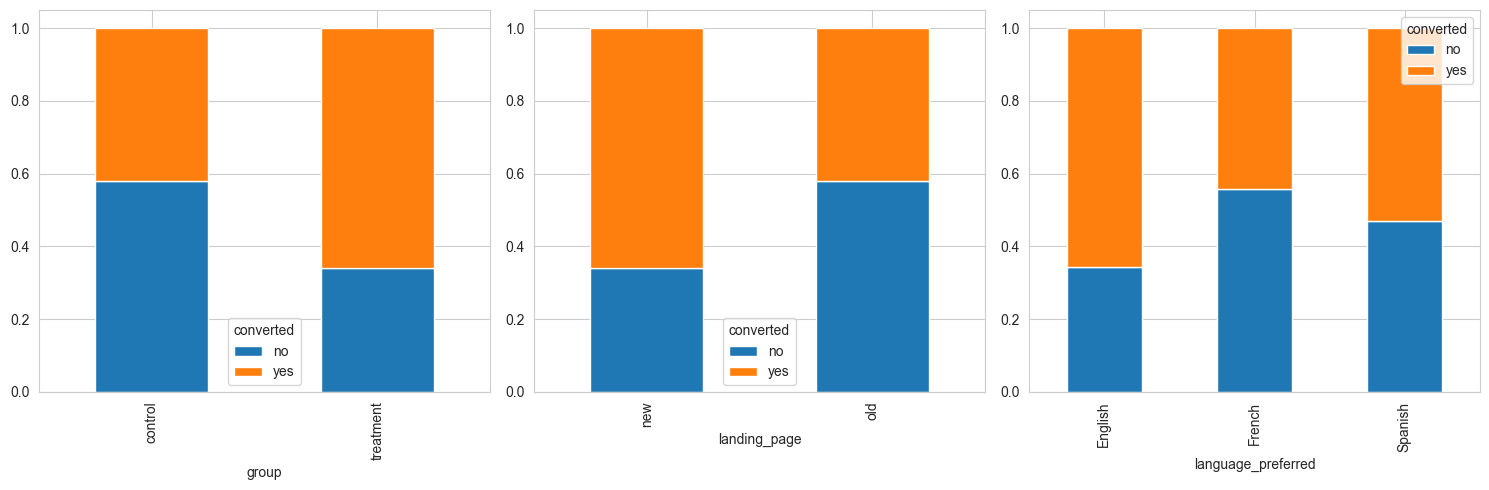

In [19]:
# Check relation of convertion rate with categorical variables
f, axs = plt.subplots(1, 3, figsize=(15, 5),gridspec_kw=dict(width_ratios=[1,1,1]))
conv_group.plot.bar(stacked=True,ax=axs[0]);
conv_page.plot.bar(stacked=True,ax=axs[1]);
conv_lang.plot.bar(stacked=True,ax=axs[2]);
f.tight_layout()

The numerical variable 'time_spent_on_the_page' is also considered on bivariate analysis to check how the time spend on the landing page could have a correlation with other variables

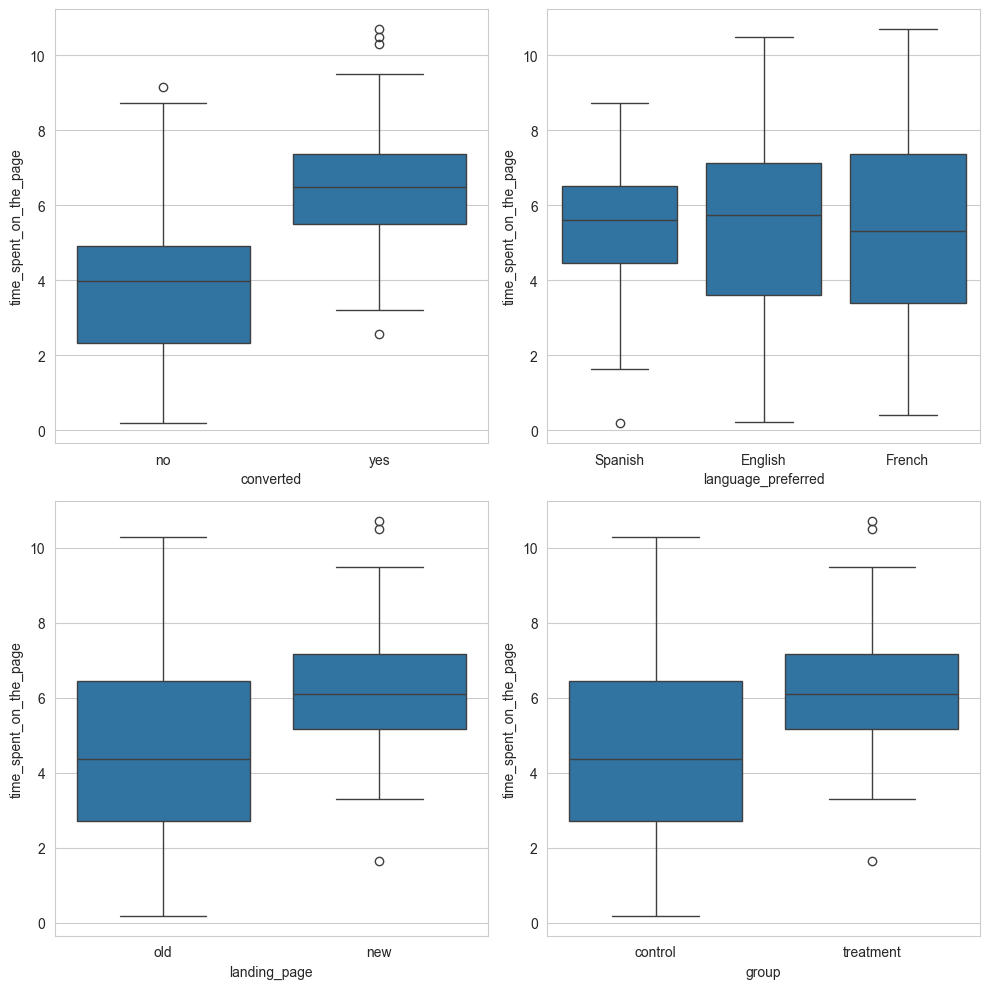

In [20]:
# Check relation of time_spent_on_the_page by category
f, axs = plt.subplots(2, 2, figsize=(10, 10),gridspec_kw=dict(width_ratios=[1,1]))
sns.boxplot(data=df, x='converted',y='time_spent_on_the_page',ax=axs[0,0]);
sns.boxplot(data=df, x='language_preferred',y='time_spent_on_the_page',ax=axs[0,1]);
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page',ax=axs[1,0]);
sns.boxplot(data=df, x='group',y='time_spent_on_the_page',ax=axs[1,1]);
f.tight_layout()

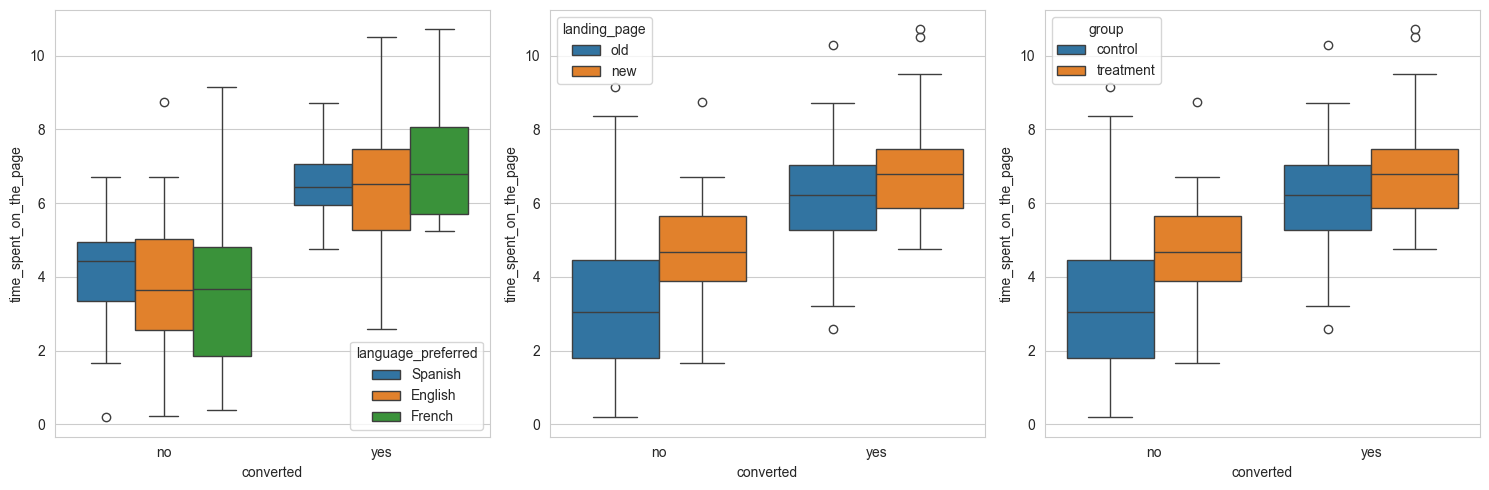

In [21]:
# Check relation of convertion rate with time_spent_on_the_page by category
f, axs = plt.subplots(1, 3, figsize=(15, 5),gridspec_kw=dict(width_ratios=[1,1,1]))
sns.boxplot(data=df, x='converted',y='time_spent_on_the_page', hue='language_preferred',ax=axs[0]);
sns.boxplot(data=df, x='converted',y='time_spent_on_the_page', hue='landing_page',ax=axs[1]);
sns.boxplot(data=df, x='converted',y='time_spent_on_the_page', hue='group',ax=axs[2]);
f.tight_layout()

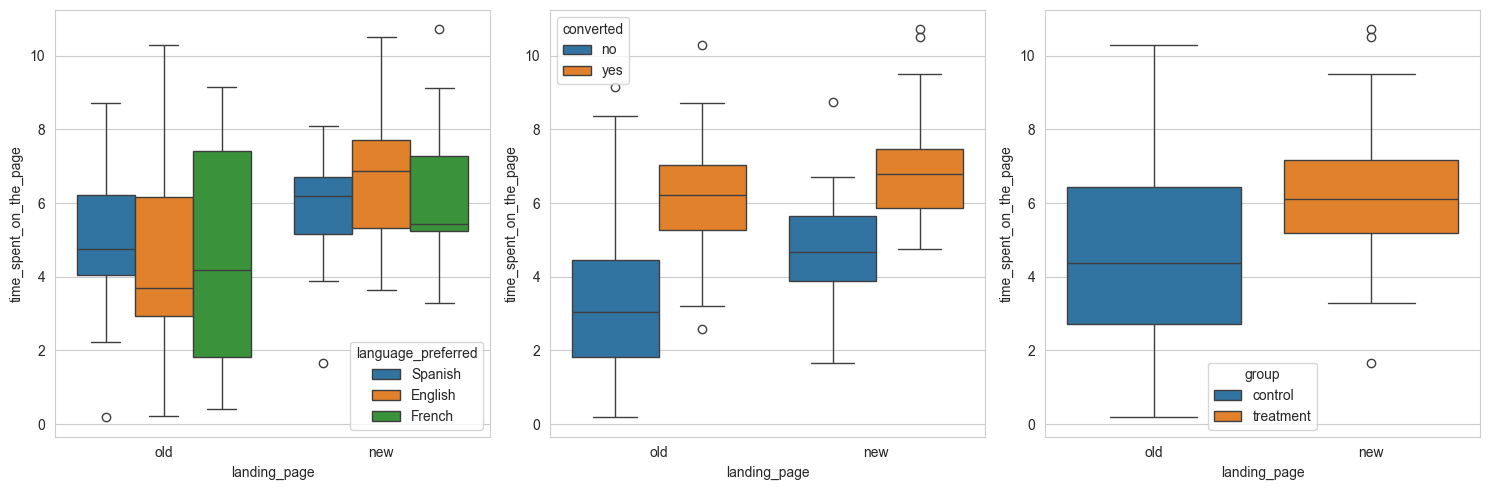

In [22]:
# Check relation of landing page with time_spent_on_the_page by category
f, axs = plt.subplots(1, 3, figsize=(15, 5),gridspec_kw=dict(width_ratios=[1,1,1]))
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page', hue='language_preferred',ax=axs[0]);
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page', hue='converted',ax=axs[1]);
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page', hue='group',ax=axs[2]);
f.tight_layout()

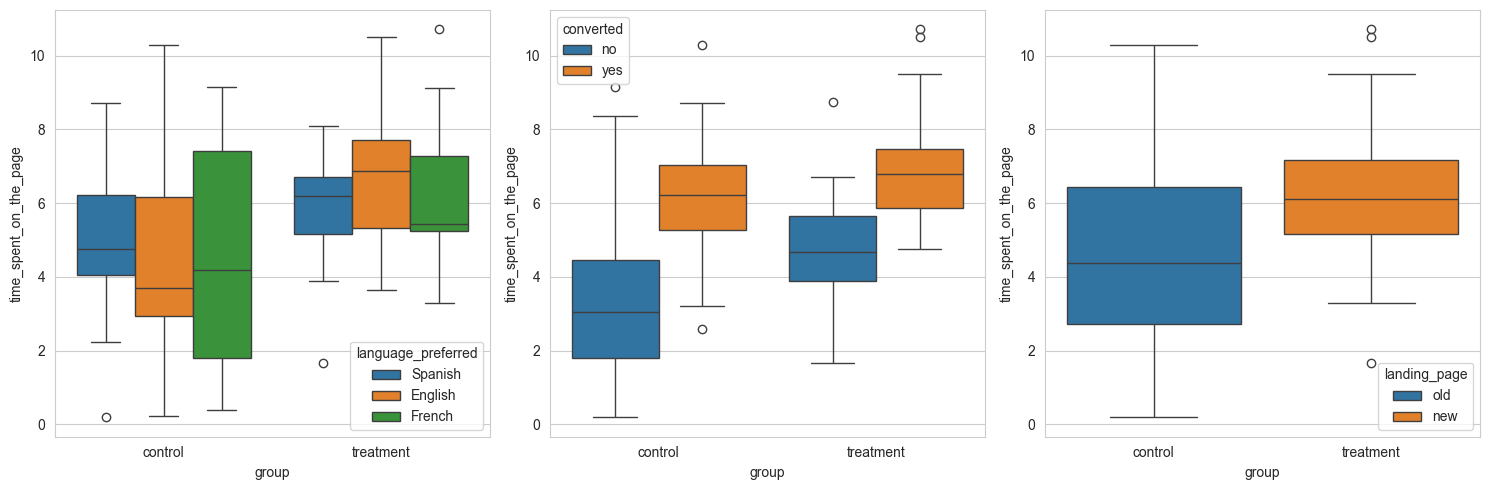

In [23]:
# the relation of group should with other variables should look similar to the relation of landing page
f, axs = plt.subplots(1, 3, figsize=(15, 5),gridspec_kw=dict(width_ratios=[1,1,1]))
sns.boxplot(data=df, x='group',y='time_spent_on_the_page', hue='language_preferred',ax=axs[0]);
sns.boxplot(data=df, x='group',y='time_spent_on_the_page', hue='converted',ax=axs[1]);
sns.boxplot(data=df, x='group',y='time_spent_on_the_page', hue='landing_page',ax=axs[2]);
f.tight_layout()

### BIVARIATE ANALYSIS RESULTS:

* Bivariate analysis performed considering the relation of variables with the variable of interest: "converted".
* The treatment group have a higher conversion rate (66%) than the control group (42%)
* The new landing page have a higher conversion rate (66%) than the old landing page (42%)
* The language with better conversion rate is English (66%), followed by Spanish (53%) and French (44%).
* For those converted, the media time spend on the page is over 6hrs, while when no converted the media time spend on the page is 4hrs. 

From the Bivariate analysis is concluded:<br>
* Regardless the language, page or group, those users who spend more than 6 hrs tend to become subscribers.
* The new page seems to be better than the old page to keep customers engaged long enough to subscribe.


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [ ]:
# Check relation time_spent_on_the_page by category
f, axs = plt.subplots(2, 2, figsize=(10, 10),gridspec_kw=dict(width_ratios=[1,1]))
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page',ax=axs[0,0]);
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page', hue='language_preferred',ax=axs[0,1]);
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page', hue='converted',ax=axs[1,0]);
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page', hue='group',ax=axs[1,1]);
f.tight_layout()

### Step 1: Define the null and alternate hypotheses

**The null and alternative hypothesis**<br>
Let $\mu_1$ be the mean time spend on the old landing page.<br>
Let $\mu_2$ be the mean time spend on the new landing page.<br>

We will test the null hypothesis

>$H_0:\mu_1 >= \mu_2$

against the alternate hypothesis

>$H_a:\mu_1 < \mu_2$

### Step 2: Select Appropriate test

In [ ]:
#calculate mean of time_spent_on_NEW_page
df['time_spent_on_the_page'][df['landing_page']=='new'].mean()

In [ ]:
#calculate mean of time_spent_on_OLD_page
df['time_spent_on_the_page'][df['landing_page']=='old'].mean()

In [ ]:
#checking normality
w,pv_time_new=stats.shapiro(df['time_spent_on_the_page'][df['landing_page']=='new'])
w,pv_time_old=stats.shapiro(df['time_spent_on_the_page'][df['landing_page']=='old'])

#Getting p_value
print('The p-value for time_new is', round(pv_time_new,4))
print('The p-value for time_old is', round(pv_time_old,4))

print('\n')

#comparing p_value with alpha
if pv_time_new>alpha:
    print ('''Since p-value of the time_new test is larger than significance level, we FAIL TO REJECT
the null hypothesis that the response follows the normal distribution.''',end='\n\n')
else:
    print ('''Since p-value of the time_new test is smaller than significance level, we REJECT 
the null hypothesis that the response follows the normal distribution.''',end='\n\n')

if pv_time_old>alpha:
    print ('''Since p-value of the time_old test is larger than significance level, we FAIL TO REJECT 
the null hypothesis that the response follows the normal distribution.''',end='\n\n')
else:
    print ('''Since p-value of the time_old test is smaller than significance level, we REJECT 
the null hypothesis that the response follows the normal distribution.''',end='\n\n')



Being the time spend on the new landing page, and the time spend on the old landing page, both continuous, normal (verified with shapiro test), independant, with unequal means (calculated), the rigth test is the **T-TEST for equality of means**

### Step 3: Decide the significance level

The significance level for the study $\alpha = 0.05$ as defined by E-News Express: "explore the data and perform a statistical analysis (at a significance level of 5%)"

In [ ]:
alpha=0.05

### Step 4: Collect and prepare data

In [ ]:
#time variable split to be compared among test gropus
time_new=df['time_spent_on_the_page'][df['landing_page']=='new']
time_old=df['time_spent_on_the_page'][df['landing_page']=='old']

### Step 5: Calculate the p-value

In [ ]:
test_stat,p_value=stats.ttest_ind(time_new,time_old,equal_var=False, alternative='greater')
print('The T_Test statistic is ', test_stat)
print('The p-value is ', p_value)

### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value>alpha:
    print ('''Since p-value of the time_new test is larger than significance level, we FAIL TO REJECT 
the null hypothesis that the mean time spend on the old landing page is greater than the mean time spend on the new landing page.''',end='\n\n')
else:
    print ('''Since p-value of the time_new test is smaller than significance level, we REJECT
the null hypothesis that the mean time spend on the old landing page is greater than the mean time spend on the new landing page.''',end='\n\n')


### Step 7:  Draw inference

### ANSWER 1
Do the users spend more time on the new landing page than on the existing landing page?<br>

* For the visualization, the media of time spend is bigger in the new landing page than in the old one. This has to be verified statistically.
* Being the variables of time spend on the new landing page, and the time spend on the old landing page, both continuous, normal (verified with shapiro test), independant, with unequal means (calculated), the rigth test is the **T-TEST for equality of means**.
* Since p-value of the time_new test is smaller than significance level, we **REJECT the null hypothesis** that the mean time spend on the old landing page is greater than the mean time spend on the new landing page.<br>

**Then, the evidence in the sample is strong enough to conclude that the users efectively spend more time on the new landing page than the existing landing page**


## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**2.1 Visualization**

In [ ]:
# visual analysis
# Check relation of convertion rate with landing_page type
conv_page=pd.crosstab(df['landing_page'],df['converted'],normalize='index')
conv_page.plot.bar(stacked=True);
conv_page

In [ ]:
pd.crosstab(df['landing_page'],df['converted'],margins='all')

**2.2 The null and alternative hypothesis**<br>
Let $p_1,p_2$ be the proportions of convertions on the new and old landing page respectively.

We will test the null hypothesis

>$H_0:p_1 <=p_2$

Against the alternate hypothesis

>$H_a:p_1 > p_2$

**2.3 Test Selection**<br>
check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{17}{50} =17 \geq 10$

>$n(1-p_1) = 50 \cdot \frac{50-17}{50} = 33 \geq 10$

>$np_2 = 50\cdot \frac{29}{50} =29 \geq 10$

>$n(1-p_2) = 50 \cdot \frac{50-29}{50} = 21 \geq 10 $

Being the variables of conversion rate (converted : ['no' 'yes']) and the the version of the landing page (landing_page : ['old' 'new']), both a binomally distributed populations, we are informed that the collected sample is a simple random sample, and the binomial distribution can be approximated to normal distribution (np and n(1-p) >10), then the right test is **TWO PROPORTION Z-TEST.**<br>


**2.4 Data preparation and Test Excecution**

In [ ]:
# set the counts convertions
convert_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = stats_sp.proportions_ztest(convert_count, nobs, alternative='larger')
print('The p-value is ' + str(p_value))

if p_value>alpha:
    print ('''Since p-value is larger than significance level, we FAIL TO REJECT 
the null hypothesis that the proportion of convertions on the new landing page is smaller than the proportion of convertions on the old landing page.''',end='\n\n')
else:
    print ('''Since p-value is smaller than significance level, we REJECT 
the null hypothesis that the proportion of convertions on the new landing page is smaller than the proportion of convertions on the old landing page.''',end='\n\n')

### ANSWER 2
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?<br>

* For the visualization, the conversion rate for the new page is greater than for the old page. This has to be verified statistically.
* Being the variables of conversion rate (converted : ['no' 'yes']) and the the version of the landing page (landing_page : ['old' 'new']), both a binomally distributed populations, we are informed that the collected sample is a simple random sample, and the binomial distribution can be approximated to normal distribution, then the right test is **TWO PROPORTION Z-TEST**.
* Since p-value is smaller than significance level, we **REJECT the null hypothesis** that the proportion of convertions on the new landing page is smaller than the proportion of convertions on the old landing page.<br>

**Then, the evidence in the sample is strong enough to conclude that the proportion of users who visit the landing page and get converted is greater for the new page than the conversion rate for the old page**


## 3. Is the conversion and preferred language are independent or related?

**3.1 Visualization**

In [ ]:
# Check relation of convertion rate with language_preferred type
conv_lang=pd.crosstab(df['language_preferred'],df['converted'],normalize='index')
conv_lang.plot.bar(stacked=True);
conv_lang.sort_values(by='yes', ascending=False)

In [ ]:
conv_lang_count=pd.crosstab(df['language_preferred'],df['converted'])
conv_lang_count

**3.2 The null and alternative hypothesis**<br>

We will test the null hypothesis

>$H_0:$ Conversion rate is independent of language.

against the alternate hypothesis

>$H_a:$ Conversion rate depends of language.

**3.3 Test Selection**<br>
Being the both variables a categorical variables, with a number of sample observations in each level of the variable is at least 5, and we are informed that the collected sample is a simple random sample, then the right test is CHI-SQUARE TEST FOR INDEPENDENCE.<br><br>
**3.4 Data preparation and Test Excecution**

In [ ]:
# find the p-value
chi, p_value, dof, expected = stats.chi2_contingency(conv_lang_count)
print('The p-value is', p_value)
if p_value>alpha:
    print ('''Since p-value is larger than significance level, we FAIL TO REJECT 
the null hypothesis that the conversion rate is independent of language.''',end='\n\n')
else:
    print ('''Since p-value is smaller than significance level, we REJECT 
the null hypothesis that the conversion rate is independent of language.''',end='\n\n')

### ANSWER 3
Does the converted status depend on the preferred language?

* Based on the visualization, it seems there is no dependency on conversion rate and preferred language. This has to be verified statistically.
* Being the both variables a categorical variables, with a number of sample observations in each level of the variable is at least 5, and we are informed that the collected sample is a simple random sample, then the right test is **CHI-SQUARE TEST FOR INDEPENDENCE**.
* Since p-value is larger than significance level, we **FAIL TO REJECT the null hypothesis** that the conversion rate is independent of language.<br>

**Then, the evidence in the sample is strong enough to conclude that conversion and preferred language are independent variables.**

## 4. Is the time spent on the new page same for the different language users?

**4.1 Visualization**

In [ ]:
# visual analysis
# we will use again the variable already defined before "time_new"
# time_new=df['time_spent_on_the_page'][df['landing_page']=='new']

f, axs = plt.subplots(2, 2, figsize=(10, 10),gridspec_kw=dict(width_ratios=[1,1]))
sns.boxplot(data=df, x='landing_page',y=time_new,ax=axs[0,0])
sns.boxplot(data=df, x='language_preferred',y=time_new,ax=axs[0,1])
sns.boxplot(data=df, x='group',y=time_new,ax=axs[1,0])
sns.boxplot(data=df, x='converted',y=time_new,ax=axs[1,1])
f.tight_layout()

**4.2 The null and alternative hypothesis**<br>
Let $\mu_1$ be the mean time spend on the new landing page in Spanish.<br>
Let $\mu_2$ be the mean time spend on the new landing page in English.<br>
Let $\mu_3$ be the mean time spend on the new landing page in French.<br>

We will test the null hypothesis

>$H_0:\mu_1 = \mu_2 = \mu_3$

against the alternate hypothesis

>$H_a:$ The mean time spend on the new landing page is different in at least one language

**4.3 Test Selection**<br>

In [ ]:
# Check for normality
for i in df['language_preferred'].unique():
    w,p=stats.shapiro(df['time_spent_on_the_page'][(df['landing_page']=='new')&(df['language_preferred']==i)])
    print(f"The p-value for the distribution of Time time spend on the NEW page in {i} is: ",round(p,4))
    if p>alpha:
        print(f'''Since p-value is larger than significance level, we FAIL TO REJECT
the null hypothesis that the Time time spend on the NEW page in {i} follows the normal distribution.''',end='\n''\n')
    else:
        print(f'''Since p-value is smaller than significance level, we REJECT
the null hypothesis that the Time time spend on the NEW page in {i} follows the normal distribution.''',end='\n''\n')



In [ ]:
# check for equality of variances
level_sp=df['time_spent_on_the_page'][(df['landing_page']=='new')&(df['language_preferred']=='Spanish')]
level_en=df['time_spent_on_the_page'][(df['landing_page']=='new')&(df['language_preferred']=='English')]
level_fr=df['time_spent_on_the_page'][(df['landing_page']=='new')&(df['language_preferred']=='French')]

levene_stat,levene_p_val=stats.levene(level_sp,level_en,level_fr)
print(f"Levene's test for equality of variances p-value = {levene_p_val}")

if levene_p_val>alpha:
    print ("Since p-value is larger than significance level, we FAIL TO REJECT the null hypothesis of homogeneity of variances.")
else:
    print ("Since p-value is smaller than significance level, we REJECT the null hypothesis of homogeneity of variances.")



Being all three variables normally distributed (verified using the Shapiro-Wilk’s test), with equal population variances (verified using the Levene's test), and we are informed that the collected sample is a simple random sample, then the right test is **One-way ANOVA Test**".<br><br>
**4.4 Data preparation and Test Excecution**

In [ ]:
# Contuncting test

ANOVA_test_stat, ANOVA_p_value = stats.f_oneway(level_sp,level_en,level_fr)

print(f"ANOVA test p-value = {ANOVA_p_value}")

if ANOVA_p_value>alpha:
    print ("Since p-value is larger than significance level, we FAIL TO REJECT the null hypothesis of time spent on the new page is the same for the different language users.")
else:
    print ("Since p-value is smaller than significance level, we REJECT the null hypothesis of time spent on the new page is the same for the different language users.")

### ANSWER 4
Is the time spent on the new page the same for the different language users?<br>

* From the visualization, the mean time spend on the new page is not the same for the different languages, nevertheless, the IQR are quite similar, then to reach a conclusion is needed to perform further statistical analysis.
* Being all three variables normally distributed (verified using the Shapiro-Wilk’s test), with equal population variances (verified using the Levene's test), and we are informed that the collected sample is a simple random sample, then the right test is **One-way ANOVA Test"**.
* Since p-value is larger than significance level, we **FAIL TO REJECT the null hypothesis** of time spent on the new page is the same for the different language users.<br>

**The evidence in the sample is strong enough to conclude that time spent on the new page is the same for the different language users.**

## Conclusion and Business Recommendations

* The new landing page created by the design team of the company has a new outline & more relevant content shown compared to the old page.
* The new landing page outline & recommended content keep customers engaged longer time compared to the old page.
* The new landing page conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page
* The evidence in the sample is strong enough to conclude: 
	* Users efectively spend more time on the new landing page.
	* The proportion of users who visit the landing page and get converted is greater for the new page.
	* There is no dependency on conversion rate and preferred language.
	* Time spent on the new page is the same for the different language users.
* **The new landing page is more effective in gathering new subscribers for the news portal.**
* **From Data Science team perspective, the new landing page is ready for move into production.**

___